# Can We Trust Fandango Ratings Yet?

In October 2015, Walt Hickey, who was FiveThirtyEight’s chief culture writer at the time, broke a story about Fandango's movie rating system appearing biased. Hickey compared the scores displayed to hidden scores, embedded in the HTML, to determine that the rating was almost always rounded up https://fivethirtyeight.com/features/fandango-movies-ratings/.

# Understanding the Data

In 2017, Alex Olteanu compiled ratings across multiple sites, including Fandango to conduct his analysis: https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/.

By comparing the sample of popular Fandango movies scores in 2015 with 2016 sample, we will identify if/how the score distributions changed after Hickey's article.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [78]:
# https://github.com/fivethirtyeight/data/blob/master/fandango/README.md
pre_article = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv')
# https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md
post_article = pd.read_csv('https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/movie_ratings_16_17.csv')

In [79]:
# isolate the necessary columns
fandango_pre = pre_article[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_pre['Year'] = fandango_pre['FILM'].str[-5:-1]
fandango_post = post_article[['movie', 'year', 'fandango']].copy()

# filter the post-article dataset to only include 2016 data
fandango_2015 = fandango_pre[fandango_pre['Year'] == '2015']
fandango_2016 = fandango_post[fandango_post['year'] == 2016]

In [80]:
print('Sample sizes: fandango_pre: {pre_length}; fandango_post: {post_length}'.format(pre_length = len(fandango_pre), post_length = len(fandango_post)))

Sample sizes: fandango_pre: 146; fandango_post: 214


# Comparing the Distributions

([<matplotlib.axis.XTick at 0x7f38279661d0>,
 <a list of 12 Text xticklabel objects>)

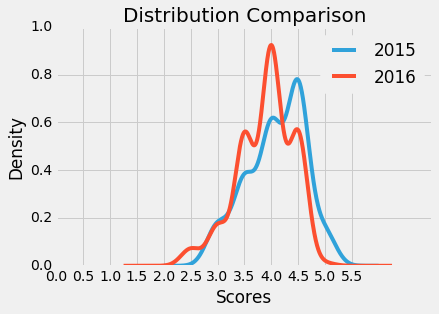

In [81]:
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Distribution Comparison', fontsize = 20)
plt.xlabel('Scores')
plt.xticks(np.arange(0, 6, 0.5))

Both distributions are left skewed with a majority of scores on the right side of the scale. However the 2015 distribution is more sharply skewed. The 2015 distribution, while still skewed, is approaching normality.

# Comparing Relative Frequencies

In [82]:
pre_freqs = fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()
pre_freqs

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [83]:
post_freqs = fandango_2016['fandango'].value_counts(normalize = True).sort_index()
post_freqs

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

In [84]:
post_freqs - pre_freqs

2.5         NaN
3.0   -0.011973
3.5    0.062543
4.0    0.116320
4.5   -0.133772
5.0   -0.064532
dtype: float64

From the above frequency tables, we can see that the scores in the 2016 sample, tend to be lower than the scores in the 2015 sample.

# Comparing Summary Statistics

In [88]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

statistics = pd.DataFrame()
statistics['2015'] = [mean_2015, median_2015, mode_2015]
statistics['2016'] = [mean_2016, median_2016, mode_2016]
statistics.index = ['mean', 'median', 'mode']
statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


While the median stayed the same, the mean dropped by almost 5% and the mode score dropped by 0.5.

# Conclusion

2016 movie ratings were slightly lower compared to 2015, when Hickey wrote his article. While we cannot establish a causal relationship between Hickey's article and the score difference, we can determine that there was a downward change in movie ratings after the article's publication.